# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Wholesale_Data.csv')
print ("The shape of the dataset is : " ,df.shape)
df.head()

The shape of the dataset is :  (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
print ("missing values:\n",df.isnull().sum())
df.describe()

missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


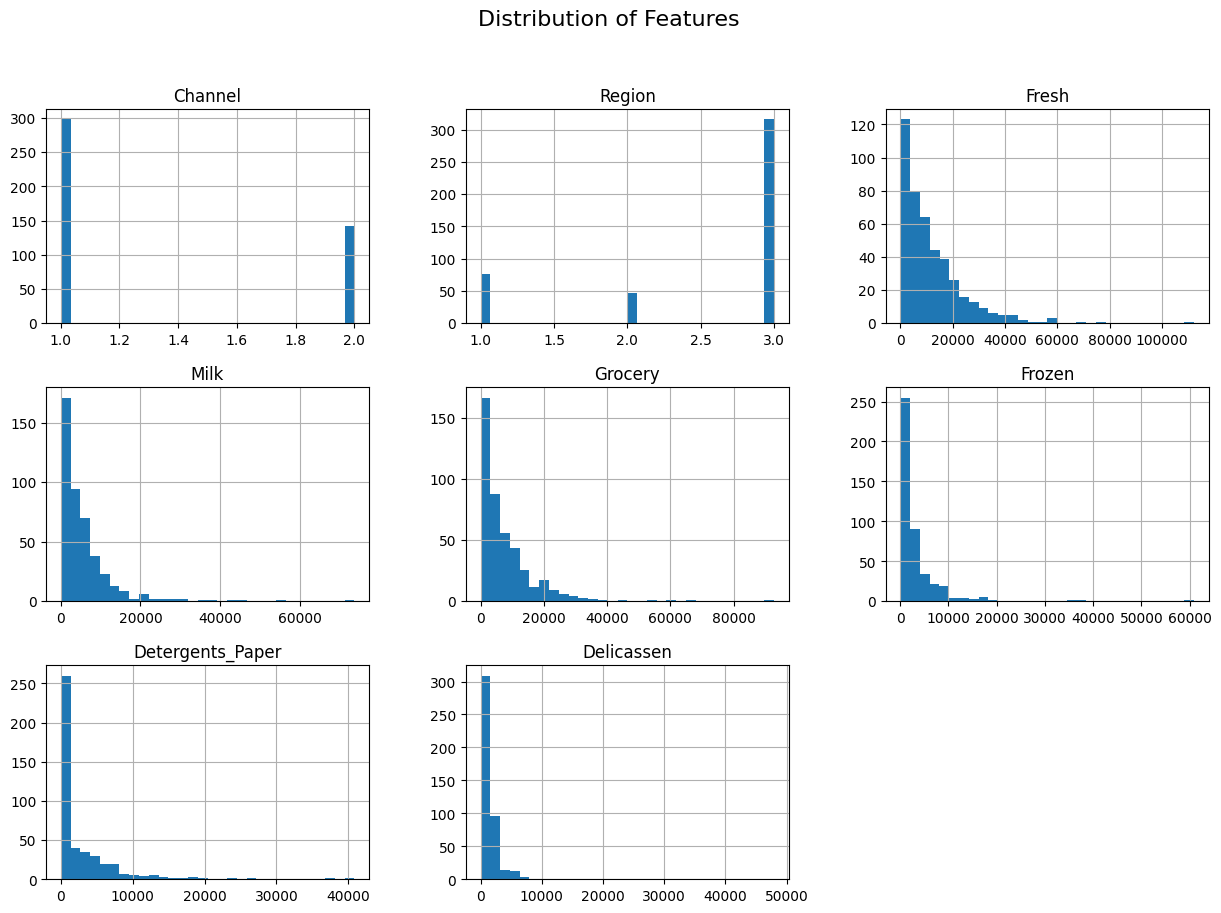

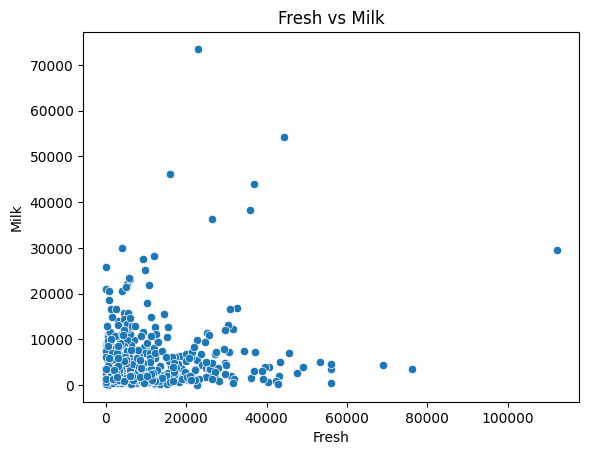

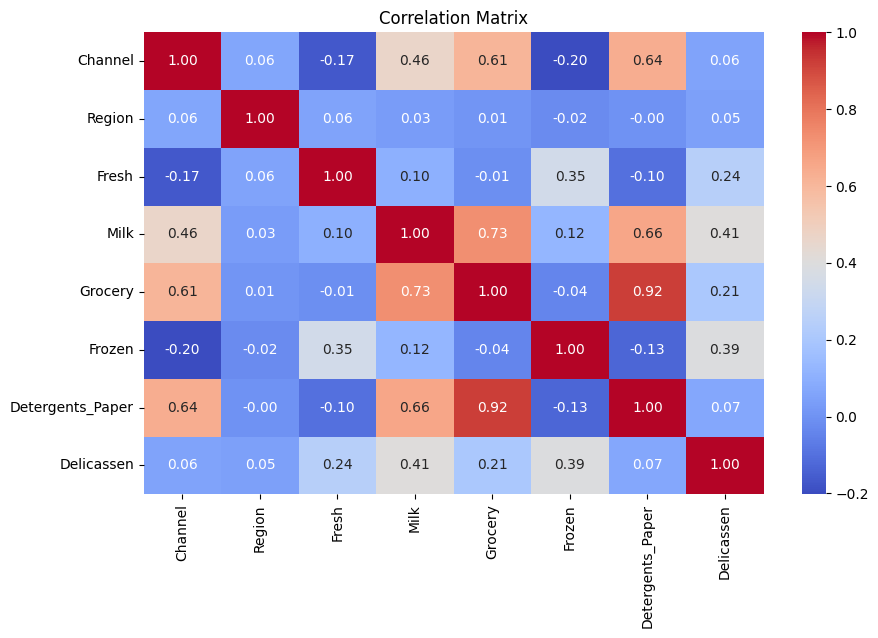

In [4]:
# Histograms
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

# Scatter plot example: Fresh vs Milk
sns.scatterplot(x='Fresh', y='Milk', data=df)
plt.title("Fresh vs Milk")
plt.show()

# Heatmap of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [5]:
#Detect outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find rows with any feature beyond 1.5*IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_rows = outliers.any(axis=1)
df_outliers = df[outlier_rows]
print("Number of potential outliers:", df_outliers.shape[0])


Number of potential outliers: 108


In [6]:
# Remove outliers using IQR method

# Calculate IQR bounds
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter data: keep rows within 1.5 * IQR
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)


Original shape: (440, 8)
Shape after removing outliers: (332, 8)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Check transformed data
scaled_df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


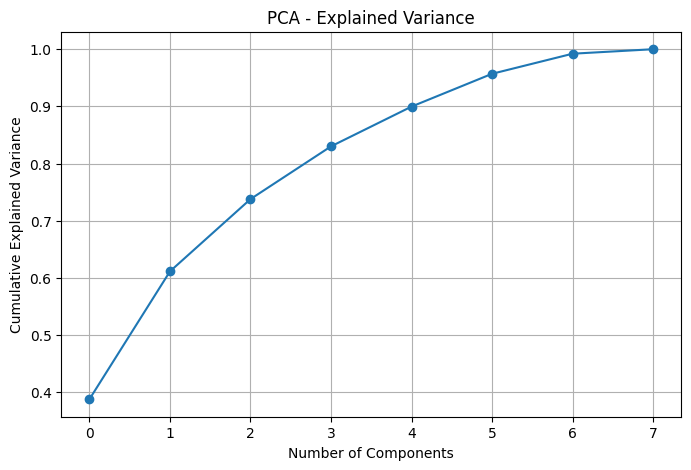

In [8]:
from sklearn.decomposition import PCA

# Keep all components for now
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()


In [19]:
pca_components = pd.DataFrame(
    pca.components_,
    columns=df_cleaned.drop(columns=['Cluster', 'Cluster_HC']).columns
)
pca_components.index = [f'PC{i+1}' for i in range(len(pca_components))]
pca_components

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC1,0.469705,0.078505,-0.105623,0.454359,0.496433,-0.158594,0.498213,0.189213
PC2,0.005991,-0.058947,0.645868,0.116929,0.038360,0.475408,-0.072113,0.577051
PC3,0.001956,0.922358,0.204496,-0.046984,-0.081185,-0.279285,-0.105863,0.097095
PC4,0.074330,0.364512,-0.316429,0.012289,0.033181,0.818594,0.125321,-0.272811
PC5,-0.166150,0.045206,-0.647752,-0.024212,-0.119778,0.008596,-0.117988,0.722385
PC6,-0.543618,0.039196,-0.021871,0.798923,0.029952,-0.008140,-0.202975,-0.148409
PC7,0.634407,-0.056107,-0.050615,0.364989,-0.590682,0.004852,-0.329259,-0.035503
PC8,-0.219578,0.004580,0.084439,0.073793,-0.616637,-0.023999,0.745748,0.047244


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

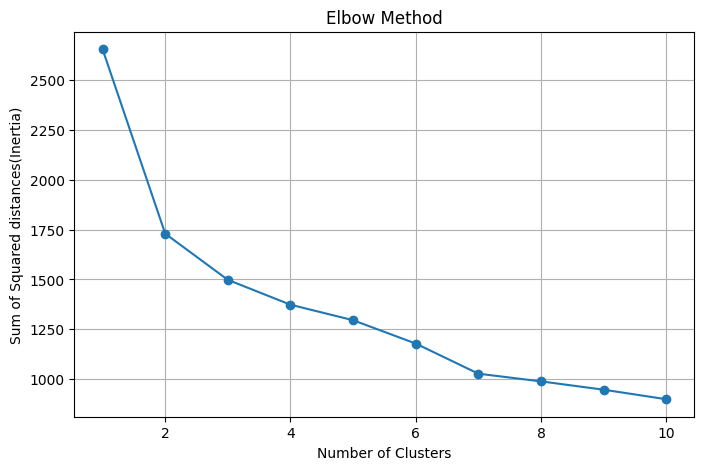

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

sse = []
k_range = range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared distances(Inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [10]:
#I chose k=3 based on the elbow curve
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
df_cleaned['Cluster'] = clusters
df_cleaned.head()

<ipython-input-10-754d80eab10d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = clusters


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
3,1,3,13265,1196,4221,6404,507,1788,2
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,0


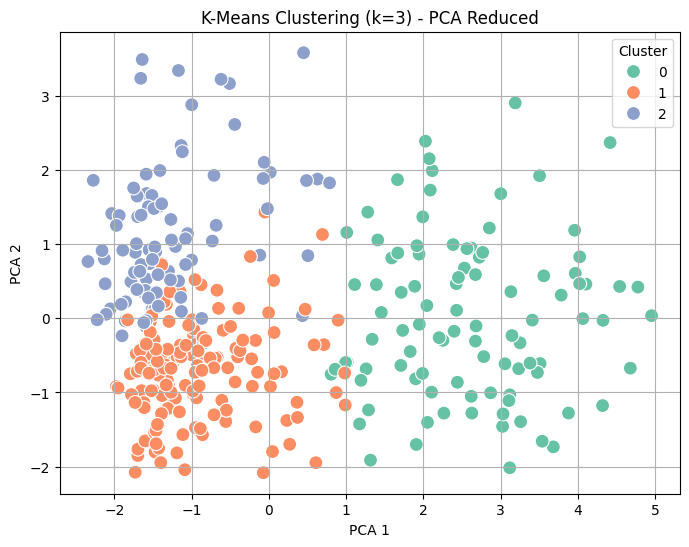

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='Set2', s=100)
plt.title(f'K-Means Clustering (k={k}) - PCA Reduced')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.drop(columns=['Cluster']))

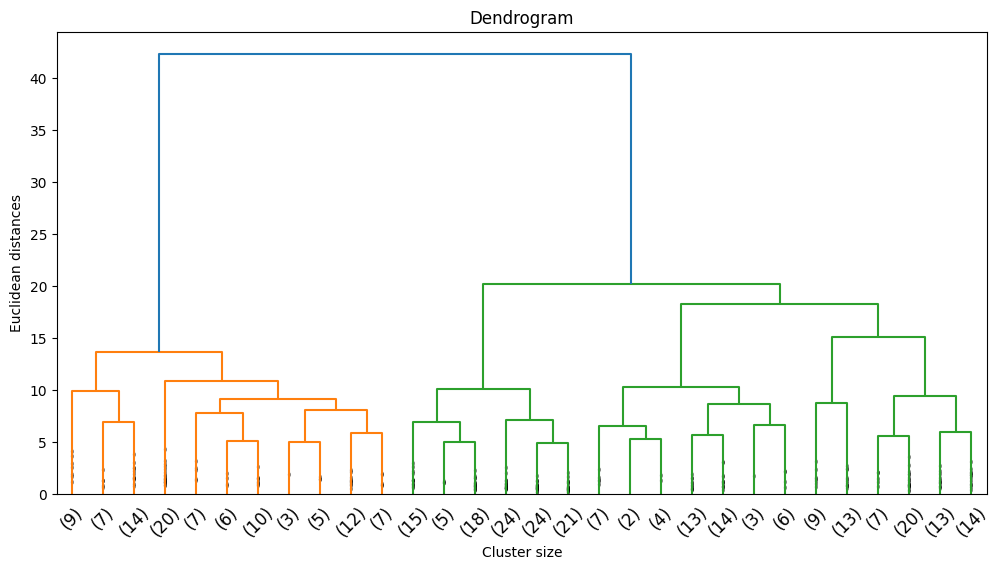

In [14]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
high_c = AgglomerativeClustering(n_clusters=3, linkage='ward') # Remove affinity argument
high_c_labels = high_c.fit_predict(scaled_data)

df_cleaned['Cluster_HC'] = high_c_labels
df_cleaned.head()

<ipython-input-15-f79e4a320b9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster_HC'] = high_c_labels


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_HC
0,2,3,12669,9656,7561,214,2674,1338,0,1
1,2,3,7057,9810,9568,1762,3293,1776,0,1
3,1,3,13265,1196,4221,6404,507,1788,2,0
5,2,3,9413,8259,5126,666,1795,1451,0,1
6,2,3,12126,3199,6975,480,3140,545,0,1


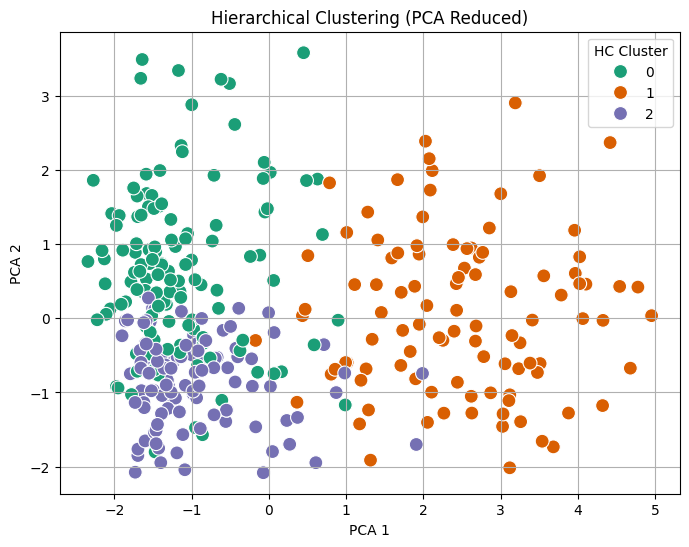

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=high_c_labels, palette='Dark2', s=100)
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='HC Cluster')
plt.grid(True)
plt.show()

In [22]:
# Get average spending per product category, grouped by HC cluster
cluster_profiles = df_cleaned.groupby('Cluster_HC').mean(numeric_only=True)

# Round for readability
cluster_profiles = cluster_profiles.round(1)

cluster_profiles

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Cluster_HC,,,,,,,,,
0,1.0,2.1,14108.5,2767.1,3521.0,2772.0,640.8,1094.8,1.6
1,1.9,2.7,8241.9,7566.9,11726.3,1372.8,4814.0,1328.1,0.1
2,1.0,3.0,5439.1,2433.1,3158.4,1259.4,830.7,634.1,1.1


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

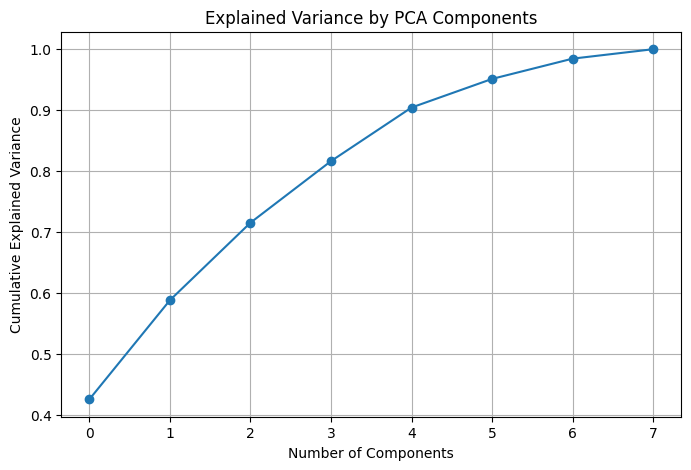

In [17]:
from sklearn.decomposition import PCA

# Reuse standardized data (excluding clusters)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
# visualized data and then cleaned it further to get ready for clustering
# after using k means and heirarchial clustering grouped customers into 3 groups based on buying patterns
# PCA helped visualize clusters showing that Grocery, Detergents_Paper, and Milk were key drivers of variance
# each cluster shows a different buying pattern, customers who bought a lot of fresh and frozen foods ex, restuarants.
# ones that bought milk,groceries, and detergent ex, regular shoppers
# ones with a more balanced pattern ex smaller businesses